In [1]:
import sys, os
from configobj import ConfigObj
from math import sqrt
import numpy as np
from astropy.io import fits
from multicens import multiCens
import matplotlib.pyplot as plt

In [2]:
def distance(a,b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [20]:
def unpack_conf(filename):
    config = ConfigObj(filename)
    x = []
    y = []
    can_ids = []
    for centroid in config.values():
        x.append(float(centroid['x_coord']))
        y.append(float(centroid['y_coord']))
        can_ids.append(centroid['can_id'])
    return x, y, can_ids

In [3]:
def unpack_fiducial_conf(filename):
    config = ConfigObj(filename)
    fid_list = []
    for fid in config.values():
        fid_list.append([float(fid['x_coord']), float(fid['y_coord'])])
    return sorted(fid_list, key=lambda x: x[0])

frames = []
directory = '/home/sharonye/DESI/lab_machine/trim/data/241017_062755_fiducial_calibration'
for file in os.scandir(directory):
    if file.path.endswith('fiducials.conf'):
        frames.append(unpack_fiducial_conf(file.path))

xs = []
ys = []
for frame in frames:
    xs.append(frame[0][0])
    ys.append(frame[0][1])
print(xs)
print(ys)
print(np.std(xs), np.std(ys))
print(sqrt(np.std(xs) ** 2 + np.std(ys) ** 2))

[1356.9258284529265, 1356.9171204863217, 1356.9241778889, 1356.9279122143132, 1356.9170756011742, 1356.9186856381584, 1356.9158622759776, 1356.9182494784259, 1356.9314528552175, 1356.916680839679]
[1696.4933960990677, 1696.4871394526383, 1696.5077718124587, 1696.4711678710182, 1696.4043654202637, 1696.49252645946, 1696.4638038465416, 1696.5192641801482, 1696.4796515264022, 1696.472012135119]
0.005272103022887947 0.029693778271632613
0.030158175314975957


In [4]:
fids = unpack_fiducial_conf('/home/sharonye/DESI/lab_machine/trim/data/241017_062755_fiducial_calibration/241017_062755_fiducials.conf')
print(fids)

[[1356.9258284529265, 1696.4933960990677], [1368.3444915996772, 1676.222356100144], [1376.1602903785072, 1694.1642031191845], [1383.7966315404897, 1711.9299164162883]]


In [5]:
def camera_scale_from_fiducial(fiducials):
    dist_0_1 = distance(fiducials[0], fiducials[1]) # should be 1.2mm
    dist_0_3 = distance(fiducials[0], fiducials[3]) # should be 1.6mm
    dist_1_3 = distance(fiducials[1], fiducials[3]) # should be 2mm
    return np.mean([1200/dist_0_1, 1600/dist_0_3, 2000/dist_1_3])

camera_scale_from_fiducial(fids)

51.537526695440306

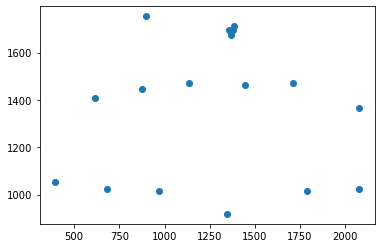

In [11]:
hdul = fits.open('/home/sharonye/DESI/lab_machine/trim/data/241024_062326_positioner_matching/centroids_zwo_241024_062328.fits')
image = hdul[0].data
X, Y, peaks, FWHM, _ = multicens.multiCens(image, n_centroids_to_keep=17, verbose=False, write_fits=False, size_fitbox=7)

plt.plot(X, Y, 'o')

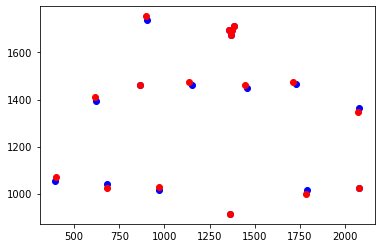

In [34]:
im_b = fits.open('/home/sharonye/DESI/lab_machine/trim/data/241027_045108_positioner_matching/centroids_zwo_241027_045110.fits')[0].data
im_a = fits.open('/home/sharonye/DESI/lab_machine/trim/data/241027_045108_positioner_matching/centroids_zwo_241027_045202.fits')[0].data

x_b, y_b, p_b, f_b, _b = multicens.multiCens(im_b, n_centroids_to_keep=17, verbose=False, write_fits=False, size_fitbox=7)
x_a, y_a, p_a, f_a, _a = multicens.multiCens(im_a, n_centroids_to_keep=17, verbose=False, write_fits=False, size_fitbox=7)

plt.plot(x_b, y_b, 'bo')
plt.plot(x_a, y_a, 'ro')

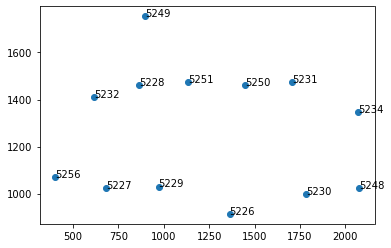

In [29]:
X, Y, ids = unpack_conf('/home/sharonye/DESI/lab_machine/trim/data/241027_045108_positioner_matching/positioners.conf')
fig, ax = plt.subplots()
ax.plot(X, Y, 'o')
for i, label in enumerate(ids):
    ax.text(X[i], Y[i], label)

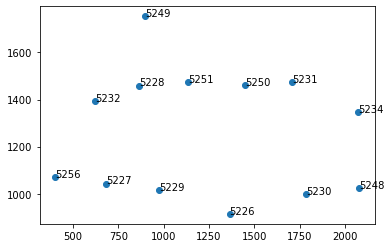

In [39]:
X, Y, ids = unpack_conf('/home/sharonye/DESI/lab_machine/trim/data/241027_065258_positioner_matching/positioners.conf')
fig, ax = plt.subplots()
ax.plot(X, Y, 'o')
for i, label in enumerate(ids):
    ax.text(X[i], Y[i], label)

peak = 85448.93526051767 brightness appears out of expected range
peak = 97585.81251408171 brightness appears out of expected range
peak = 70816.4466304986 brightness appears out of expected range
peak = 66548.58269725139 brightness appears out of expected range
peak = 85403.87828180812 brightness appears out of expected range
peak = 97822.90751117568 brightness appears out of expected range
peak = 70877.72438284577 brightness appears out of expected range
peak = 66508.86274907594 brightness appears out of expected range


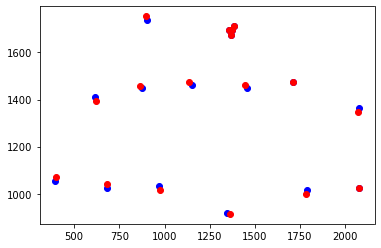

In [40]:
im_b = fits.open('/home/sharonye/DESI/lab_machine/trim/data/241027_065258_positioner_matching/centroids_zwo_241027_065300.fits')[0].data
im_a = fits.open('/home/sharonye/DESI/lab_machine/trim/data/241027_065258_positioner_matching/centroids_zwo_241027_065354.fits')[0].data

x_b, y_b, p_b, f_b, _b = multicens.multiCens(im_b, n_centroids_to_keep=17, verbose=False, write_fits=False, size_fitbox=7)
x_a, y_a, p_a, f_a, _a = multicens.multiCens(im_a, n_centroids_to_keep=17, verbose=False, write_fits=False, size_fitbox=7)

plt.plot(x_b, y_b, 'bo')
plt.plot(x_a, y_a, 'ro')